In [34]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
with open("../data/2015_draft",'r') as f:
    player_data = pickle.load(f)
df = pd.DataFrame(player_data[1:], columns=player_data[0])

In [25]:
df = df.convert_objects(convert_numeric=True)

In [26]:
df.head()

,Rnd,Pick,Tm,Name,Pos,Age,To,AP1,PB,St,...,TD,Rec,Yds,TD,Tkl,Int,Sk,College/Univ,College_Stats,year
0,1,1,CLE,Courtney Brown,DE,22,2005,0,0,4,...,NaN,NaN,NaN,NaN,155,NaN,19.0,Penn St.,College Stats,2000
1,1,2,WAS,LaVar Arrington,LB,22,2006,0,3,5,...,NaN,NaN,NaN,NaN,331,3,23.5,Penn St.,College Stats,2000
2,1,3,WAS,Chris Samuels,T,23,2009,0,6,9,...,NaN,NaN,NaN,NaN,1,NaN,NaN,Alabama,College Stats,2000
3,1,4,CIN,Peter Warrick,WR,23,2005,0,0,4,...,2,275,2991,18,12,NaN,NaN,Florida St.,College Stats,2000
4,1,5,BAL,Jamal Lewis,RB,21,2009,1,1,9,...,58,221,1879,4,8,NaN,NaN,Tennessee,College Stats,2000


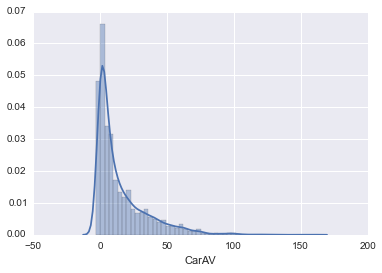

In [27]:
sns.distplot(df.CarAV.dropna())

In [31]:
df_clean = df[pd.notnull(df.CarAV)]
df_clean.shape

(3709, 30)

In [47]:
top_10_pos = df_clean.Pos.value_counts()[:10].index
df_pos = df_clean[df_clean.Pos.isin(top_10_pos)]

In [49]:
df_pos.shape

(3415, 30)

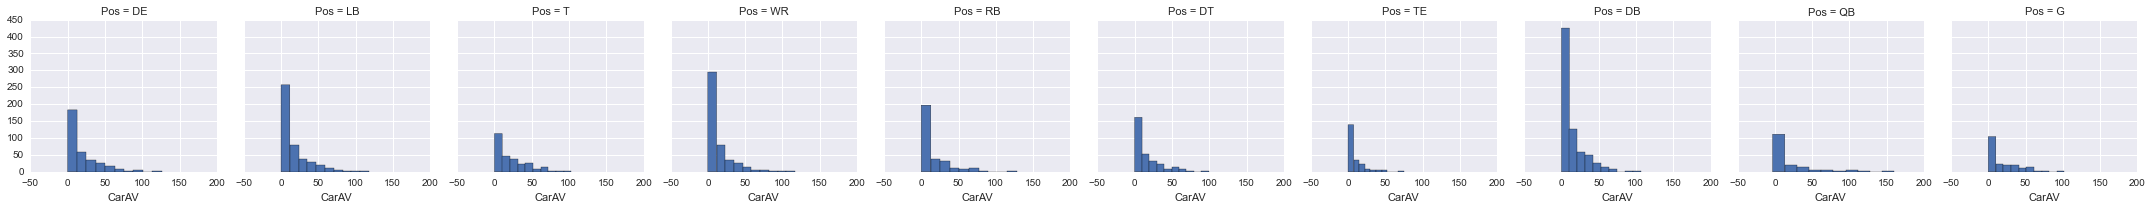

In [55]:
g = sns.FacetGrid(df_pos, col="Pos")
g.map(plt.hist, "CarAV");

In [56]:
df_clean.groupby('Rnd').CarAV.mean()

Rnd
1    34.477228
2    22.810379
3    15.054511
4    12.107527
5     8.713178
6     7.211650
7     6.280069
Name: CarAV, dtype: float64

In [69]:
pos_car = df_clean.groupby('Pos').CarAV.mean()

In [72]:
pos_car.order(ascending=False)

Pos
NT     22.222222
T      21.215328
C      20.228916
QB     18.553571
G      18.355330
DE     17.868657
LB     16.454139
DT     15.182724
RB     14.769231
DB     13.488732
WR     13.396552
P      11.321429
K      11.125000
TE      8.654545
FS      4.000000
FB      3.075000
ILB     2.818182
OLB     2.388889
SS      2.285714
OL      2.194444
CB      1.909091
LS      1.000000
DL      0.000000
Name: CarAV, dtype: float64

In [81]:
df_clean.sort(['CarAV'], ascending=False)[['Name', 'Pos', 'Rnd', 'Pick', 'CarAV']].head(10)

,Name,Pos,Rnd,Pick,CarAV
208,Tom Brady,QB,6,199,160
299,Drew Brees,QB,2,32,147
270,LaDainian Tomlinson,RB,1,5,128
522,Julius Peppers,DE,1,2,126
1071,Philip Rivers,QB,1,4,121
8,Brian Urlacher,LB,1,9,118
295,Reggie Wayne,WR,1,30,117
1355,Aaron Rodgers,QB,1,24,112
1078,Ben Roethlisberger,QB,1,11,108
544,Ed Reed,DB,1,24,106


In [88]:
from sklearn.cross_validation import train_test_split

df_prediction = df[['Pos', 'Rnd', 'Pick', 'CarAV']]
df_prediction = df_prediction.dropna()
features = ['Pos', 'Rnd', 'Pick']
X = df_prediction[features]
X = pd.get_dummies(X)
y = df_prediction['CarAV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Test RMSE: {0}".format(np.sqrt(mean_squared_error(y_test, pred))))

Test RMSE: 19.0394556784


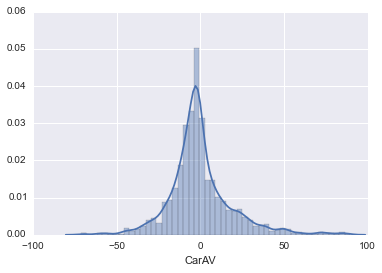

In [95]:
sns.distplot(y_test - pred)

In [102]:
fi = zip(X.columns, clf.feature_importances_)
fi = sorted(fi, key=lambda x:x[1], reverse=True)
fi

[(u'Pick', 0.74057355030955418),
 (u'Pos_WR', 0.027251325026239556),
 (u'Pos_QB', 0.026284907953210087),
 (u'Rnd', 0.024608358747377927),
 (u'Pos_LB', 0.023325271548009431),
 (u'Pos_DB', 0.023244069808998812),
 (u'Pos_DE', 0.022416329004330184),
 (u'Pos_RB', 0.020809612266325495),
 (u'Pos_T', 0.019328648430449551),
 (u'Pos_DT', 0.016179252959674748),
 (u'Pos_G', 0.015783498291433298),
 (u'Pos_C', 0.010605214872418485),
 (u'Pos_TE', 0.0098016266470714788),
 (u'Pos_NT', 0.0061282718000366231),
 (u'Pos_CB', 0.0033879088823145376),
 (u'Pos_OLB', 0.0022238058553690535),
 (u'Pos_K', 0.0021160134638889883),
 (u'Pos_ILB', 0.0013145299160797032),
 (u'Pos_P', 0.0012959567575557965),
 (u'Pos_FB', 0.001160939197053856),
 (u'Pos_OL', 0.00097489972575304262),
 (u'Pos_SS', 0.00068067392576227556),
 (u'Pos_FS', 0.00043987713249530035),
 (u'Pos_LS', 3.2781030621886093e-05),
 (u'Pos_DL', 3.2676447975885517e-05)]